In [2]:
import pandas as pd
import statsmodels.api as sm
import math
from matplotlib import pyplot as plt


In [3]:
# read data from excercise 1 (runtime bruteforce algorithm for n cities)

data = pd.read_csv("runtime.csv", sep="\t")
data.head(10)

,n,runtime,logruntime
0,4,0.000030,-10.412956
1,5,0.000125,-8.987746
2,6,0.008953,-4.715756
3,7,0.006412,-5.049579
4,8,0.055637,-2.888909
5,9,0.552404,-0.593476
6,10,5.898209,1.774649
7,11,79.035545,4.369898


In [5]:
# estimate model using OLS

# independent variable: n (=number of cities) 
x = data.n
# include constant in model
x = sm.add_constant(x)
# dependent variable: ln(runtime)
y = data.logruntime

# use OLS regression from statsmodel library 
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             logruntime   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     242.0
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.47e-06
Time:                        17:14:47   Log-Likelihood:                -8.9205
No. Observations:                   8   AIC:                             21.84
Df Residuals:                       6   BIC:                             22.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.6540      1.031    -18.091      0.0

/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# prediction method

const = (math.e)**-18.6540
coef = (math.e)**2.0455

print("f*(x) = {} + {}^x".format(const,coef))

def predict(n):
    global const, coef
    return const + coef**n

f*(x) = 7.919007140709145e-09 + 7.733024083484697^x


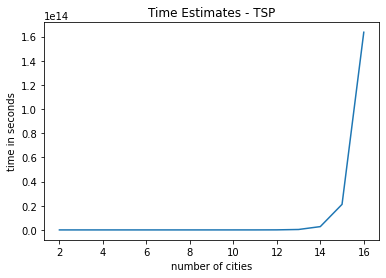

 n - time(sec)
 2 - 59.799661
 3 - 462.432222
 4 - 3575.999513
 5 - 27653.290354
 6 - 213843.560292
 7 - 1653657.401835
 8 - 12787772.514221
 9 - 98888152.826598
10 - 764704467.379396
11 - 5913478062.993209
12 - 45729068278.284920
13 - 353623986311.293335
14 - 2734582802643.094238
15 - 21146594671122.128906
16 - 163527125875476.562500


In [11]:
# estimate runtime and plot results

x_, y_ = [], []

for i in range(2,17):
    x_.append(i)
    y_.append(predict(i))
    
plt.plot(x_, y_)
plt.xlabel("number of cities")
plt.ylabel("time in seconds")
plt.title("Time Estimates - TSP")
plt.show()

print(" n - time(sec)")
for n, t in zip(x_,y_):
    print("{:2} - {:5f}".format(n,t))


In [ ]:
# inspired by https://towardsdatascience.com/modeling-exponential-growth-49a2b6f22e1f